In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv
/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv


In [2]:
import pandas as pd
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)  # No limit on column width

In [3]:
df_train = pd.read_csv("/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv", header=0)
df_train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
df_train[df_train["label"] == 0]["tweet"].iloc[2]

'  bihday your majesty'

In [5]:
df_train.shape

(31962, 3)

In [6]:
df_train[df_train["label"] == 0].count()


id       29720
label    29720
tweet    29720
dtype: int64

In [7]:
#df.query('label == 0').count()
len(df_train[df_train["label"] == 0])

29720

In [8]:
len(df_train[df_train["label"] == 1])

2242

In [9]:
df_test = pd.read_csv("/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv")

In [10]:
df_test.shape

(17197, 2)

In [11]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

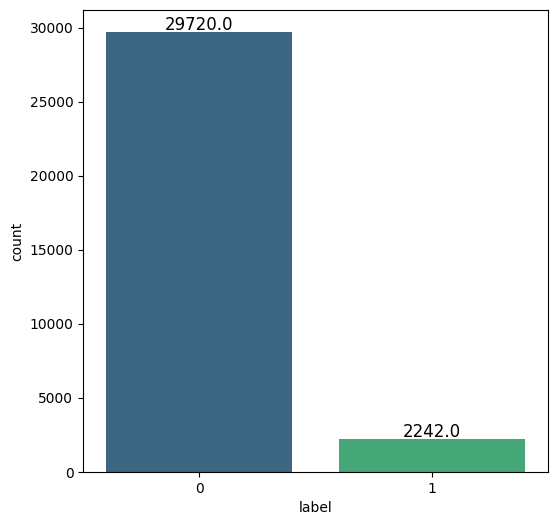

In [13]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_train, x="label", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

In [14]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [15]:
df_train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [16]:
df_train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


## Cleanse Data

In [17]:
import re

In [18]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # remove URLs
    text = re.sub(r"@\w+", "", text) #remove mentions
    text = re.sub(r"#\w+", "", text) #remove hashtags
    #text = re.sub(r"[^\w\s]", "", text) #remove special characters
    return text.lower().strip()

In [19]:
df_train['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [20]:
df_train['cleaned_tweet']= df_train['tweet'].apply(clean_text)

In [21]:
df_train.head(20)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so !


In [22]:
def decode_text(text):
    try:
        #Handling the characters's error
        return text.encode('latin1').decode('utf-8', errors='ignore')
    except UnicodeDecodeError:
        return text

In [23]:
def contains_invalid_encoding(text):
    # Kiểm tra nếu text là chuỗi và tìm ký tự không hợp lệ
    if isinstance(text, str):
        # Regex tìm các ký tự không phải Unicode hợp lệ (biểu hiện của mã hóa sai)
        return bool(re.search(r'[^\x00-\x7F]+', text))  # Tìm ký tự ngoài bảng mã ASCII chuẩn
    return False  # Nếu không phải chuỗi, trả về False

In [24]:
# Đảm bảo cột 'tweet' là kiểu chuỗi trước khi áp dụng hàm kiểm tra
df_train['cleaned_tweet'] = df_train['cleaned_tweet'].astype(str)

# Tạo một cột mới để lưu tweet đã được mã hóa lại
df_train['decoded_tweet'] = df_train['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)

# Lọc ra những dòng chứa ký tự mã hóa sai (ngoài bảng ASCII)
invalid_tweets = df_train[df_train['cleaned_tweet'].apply(contains_invalid_encoding)]

# Kiểm tra các tweet đã được mã hóa lại
invalid_tweets_after_decoding = df_train[df_train['cleaned_tweet'] != df_train['decoded_tweet']]

# Hiển thị những dòng chứa ký tự mã hóa sai
print(f"Những tweet chứa ký tự mã hóa sai (ngoài bảng ASCII):")
print(invalid_tweets[['cleaned_tweet']])  # Hiển thị chỉ cột tweet

Những tweet chứa ký tự mã hóa sai (ngoài bảng ASCII):
                                                                     cleaned_tweet
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦
6                                                 camping tomorrow        dannyâ¦
7      the next school year is the year for exams.ð¯ can't think about that ð­
8                                             we won!!! love the land!!!       â¦
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may
...                                                                            ...
31939                                       whew  ð it's a productive and   !!!
31942                                             this week is flying by    -   ¦
31945                                                    feel like... ðð¶ð
31955                                   less than 2 weeks ððð¼ð¹ððµ
31957               ate  isz that

In [25]:
print(f"Những tweet đã được mã hóa lại:")
print(invalid_tweets_after_decoding[['cleaned_tweet', 'decoded_tweet']])

Những tweet đã được mã hóa lại:
                                                                     cleaned_tweet  \
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   
6                                                 camping tomorrow        dannyâ¦   
7      the next school year is the year for exams.ð¯ can't think about that ð­   
8                                             we won!!! love the land!!!       â¦   
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may   
...                                                                            ...   
31939                                       whew  ð it's a productive and   !!!   
31942                                             this week is flying by    -   ¦   
31945                                                    feel like... ðð¶ð   
31955                                   less than 2 weeks ððð¼ð¹ððµ   
31957               at

In [26]:
repeated_char_train = []
for i, tweet in enumerate(df_train['decoded_tweet']):
  if re.match(r'\w*(\w)\1+',tweet):
    repeated_char_train.append(i)

In [27]:
len(repeated_char_train)

4583

In [28]:
#Repeated char function 
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [29]:
df_train['clean_duplicate']=df_train['decoded_tweet'].apply(repeated_char)

In [30]:
df_train.head(20)

,id,label,tweet,cleaned_tweet,decoded_tweet,clean_duplicate
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now #motivation,factsguide: society now,factsguide: society now,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦,camping tomorrow danny…,camping tomorrow danny…
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­,the next school year is the year for exams.😯 can't think about that 😭,the next school year is the year for exams.😯 can't think about that 😭
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! â¦,we won!!! love the land!!! …,we won!!! love the land!!! …
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so !,welcome here ! i'm it's so !,welcome here ! i'm it's so !


## Emoji Processing

In [31]:
!pip install emoji

In [32]:
import emoji
def emoji_text_trans(text):
    text= emoji.demojize(text).replace (':', ' ')

    #delete repeated emoji 
    tokenize= text.split()
    repeated_list=[]
    for word in tokenize:
        if word not in repeated_list:
            repeated_list.append(word)

    text=' '.join(word for word in repeated_list)
    text= text.replace("_", " ").replace("-", " ")
    return text

In [33]:
df_train["deemoji_tweet"] = df_train["clean_duplicate"].apply(emoji_text_trans)

In [35]:
from sklearn.model_selection import train_test_split
#label
y= df_train.label
#features
x=df_train.deemoji_tweet
#split into test and train dataset with test size 20% 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

28869    he was investigated for terrorist ties twice before. known to fbi and police as a terror suspect.
6813                                3 weeks until holiday!!!!!!! sun person swimming soft ice cream bikini
29888                                                                                      can you relate?
10931                                                          just can't get enough of him!! purple heart
16146                officially signed up for this year   and on the way to getting our team put together!
Name: deemoji_tweet, dtype: object

## Distill BERT

In [37]:
import torch
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize dữ liệu
texts = x_train.tolist()  # Dữ liệu văn bản
labels = y_train.tolist()  # Nhãn

encoded_inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']
labels = torch.tensor(labels)


### fine-tune

In [38]:
from transformers import DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch

# Khởi tạo mô hình với số nhãn
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=2
)

# Dataset và DataLoader
dataset = TensorDataset(input_ids, attention_mask, labels)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Optimizer và Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Huấn luyện
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(3):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask,
            labels=b_labels
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {epoch_loss / len(train_loader):.4f}")


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.1568
Epoch 2, Loss: 0.0774
Epoch 3, Loss: 0.0325


### evaluate model

In [ ]:
# model.eval()
# with torch.no_grad():
#     # Chạy mô hình với tập validation
#     outputs = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
#     logits = outputs.logits
#     predictions = torch.argmax(logits, dim=-1)


In [39]:
# Tokenize dữ liệu x_test
texts_test = x_test.tolist()  # Dữ liệu văn bản test
labels_test = y_test.tolist()  # Nhãn test

encoded_test_inputs = tokenizer(
    texts_test,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

test_input_ids = encoded_test_inputs['input_ids']
test_attention_mask = encoded_test_inputs['attention_mask']
test_labels = torch.tensor(labels_test)

# Tạo DataLoader cho tập test
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Đánh giá mô hình
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)

        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask
        )
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        correct += (predictions == b_labels).sum().item()
        total += b_labels.size(0)

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.9587


In [ ]:
# import pickle

# # Lưu các hàm trong tệp Python
# with open('/kaggle/working/tokenizer_functions.pkl', 'wb') as f:
#     pickle.dump({
#         'tokenize_data': tokenize_data,
#         'data_split': data_split,
#         'DistilBert_model': DistilBert_model
#     }, f)


## Save model

In [40]:
# Lưu mô hình và tokenizer vào thư mục
model.save_pretrained("/kaggle/working/distilbert_model")
tokenizer.save_pretrained("/kaggle/working/distilbert_model")


('/kaggle/working/distilbert_model/tokenizer_config.json',
 '/kaggle/working/distilbert_model/special_tokens_map.json',
 '/kaggle/working/distilbert_model/vocab.txt',
 '/kaggle/working/distilbert_model/added_tokens.json')

In [42]:
import shutil

# Nén thư mục mô hình thành file zip
shutil.make_archive('/kaggle/working/distilbert_model.zip', 'zip', '/kaggle/working', 'distilbert_model')

'/kaggle/working/distilbert_model.zip.zip'

In [ ]:
# new_texts = ["This product is amazing!", "I hated the service."]
# # Tokenize dữ liệu test (đã có hàm tokenize_data)
# tokenized_test_data = tokenize_data(new_texts, tokenizer)  # Tokenize dữ liệu test

# # Chia dữ liệu test thành các batch (đã có hàm data_split)
# list_test_df = data_split(tokenized_test_data, batch_size)  # Chia test thành batch

# # Chạy mô hình DistilBERT để trích xuất đặc trưng cho dữ liệu test (đã có hàm DistilBert_model)
# BERT_test_features = DistilBert_model(list_test_df)  # Chạy mô hình DistilBERT trên test

## Test classification

In [43]:
df_test["tweet"]

0                                                               #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦ 
1                                                     @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why  
2                                                                                  safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!! 
3           is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite
4                                                              3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦ 
                                                                               ...                                                                        
17192                                         thought factory: left-ri

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [44]:
df_test['cleaned_tweet']= df_test['tweet'].apply(clean_text)
# Đảm bảo cột 'tweet' là kiểu chuỗi trước khi áp dụng hàm kiểm tra
df_test['cleaned_tweet'] = df_test['cleaned_tweet'].astype(str)

# Tạo một cột mới để lưu tweet đã được mã hóa lại
df_test['decoded_tweet'] = df_test['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)
df_test['clean_duplicate']=df_test['decoded_tweet'].apply(repeated_char)
df_test["deemoji_tweet"] = df_test["clean_duplicate"].apply(emoji_text_trans)

In [47]:
import torch
torch.cuda.empty_cache()

In [48]:
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

# Giả sử bạn đã tải mô hình và tokenizer
model = DistilBertForSequenceClassification.from_pretrained("/kaggle/working/distilbert_model")
tokenizer = DistilBertTokenizer.from_pretrained("/kaggle/working/distilbert_model")

# Dữ liệu test (df_test) không có nhãn
texts = df_test['deemoji_tweet'].tolist()

# Tokenize dữ liệu
encoded_inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=128,  # Bạn có thể điều chỉnh max_length nếu cần
    return_tensors="pt"
)

input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']

# Chuyển mô hình và dữ liệu sang GPU nếu có (nếu không sẽ sử dụng CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

# Dự đoán nhãn
model.eval()  # Chế độ đánh giá
with torch.no_grad():  # Không tính toán gradient khi chỉ dự đoán
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

# Chuyển các dự đoán thành nhãn
predicted_labels = predictions.cpu().numpy()

# Thêm nhãn dự đoán vào DataFrame
df_test['predicted_labels'] = predicted_labels

# In kết quả
print(df_test[['deemoji_tweet', 'predicted_labels']])



OutOfMemoryError: CUDA out of memory. Tried to allocate 2.56 GiB. GPU 0 has a total capacity of 14.74 GiB of which 696.12 MiB is free. Process 2944 has 14.06 GiB memory in use. Of the allocated memory 11.79 GiB is allocated by PyTorch, and 2.13 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
tweets = [
    "This person is so stupid, how do they even exist?!",  # Hate speech
    "All those people are worthless. Can't believe they have the nerve to speak up!",  # Hate speech
    "Anyone who thinks like that is a disgrace to society",  # Hate speech
   ]

In [ ]:
new_tweets = pd.DataFrame(tweets, columns =["tweet"])

In [ ]:
new_tweets["deemoji_tweet"] =  new_tweets["tweet"].apply(emoji_text_trans)

In [49]:
from IPython.display import FileLink
FileLink(r'distilbert_model.zip.zip')

/kaggle/working/distilbert_model.zip.zip